## my data sceince project on Telco Customer Churn data set from kaggel
### the goal is to do EDA on it and develop a classifier model for further prediction

### importing necessary library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### reading the data

In [209]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## checking the data
check data for:
* statics
* types
* nan value
* duplicate value
## and mainly do EDA on the data

In [6]:
df.shape

(7043, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.duplicated().sum()

0

In [18]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [20]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

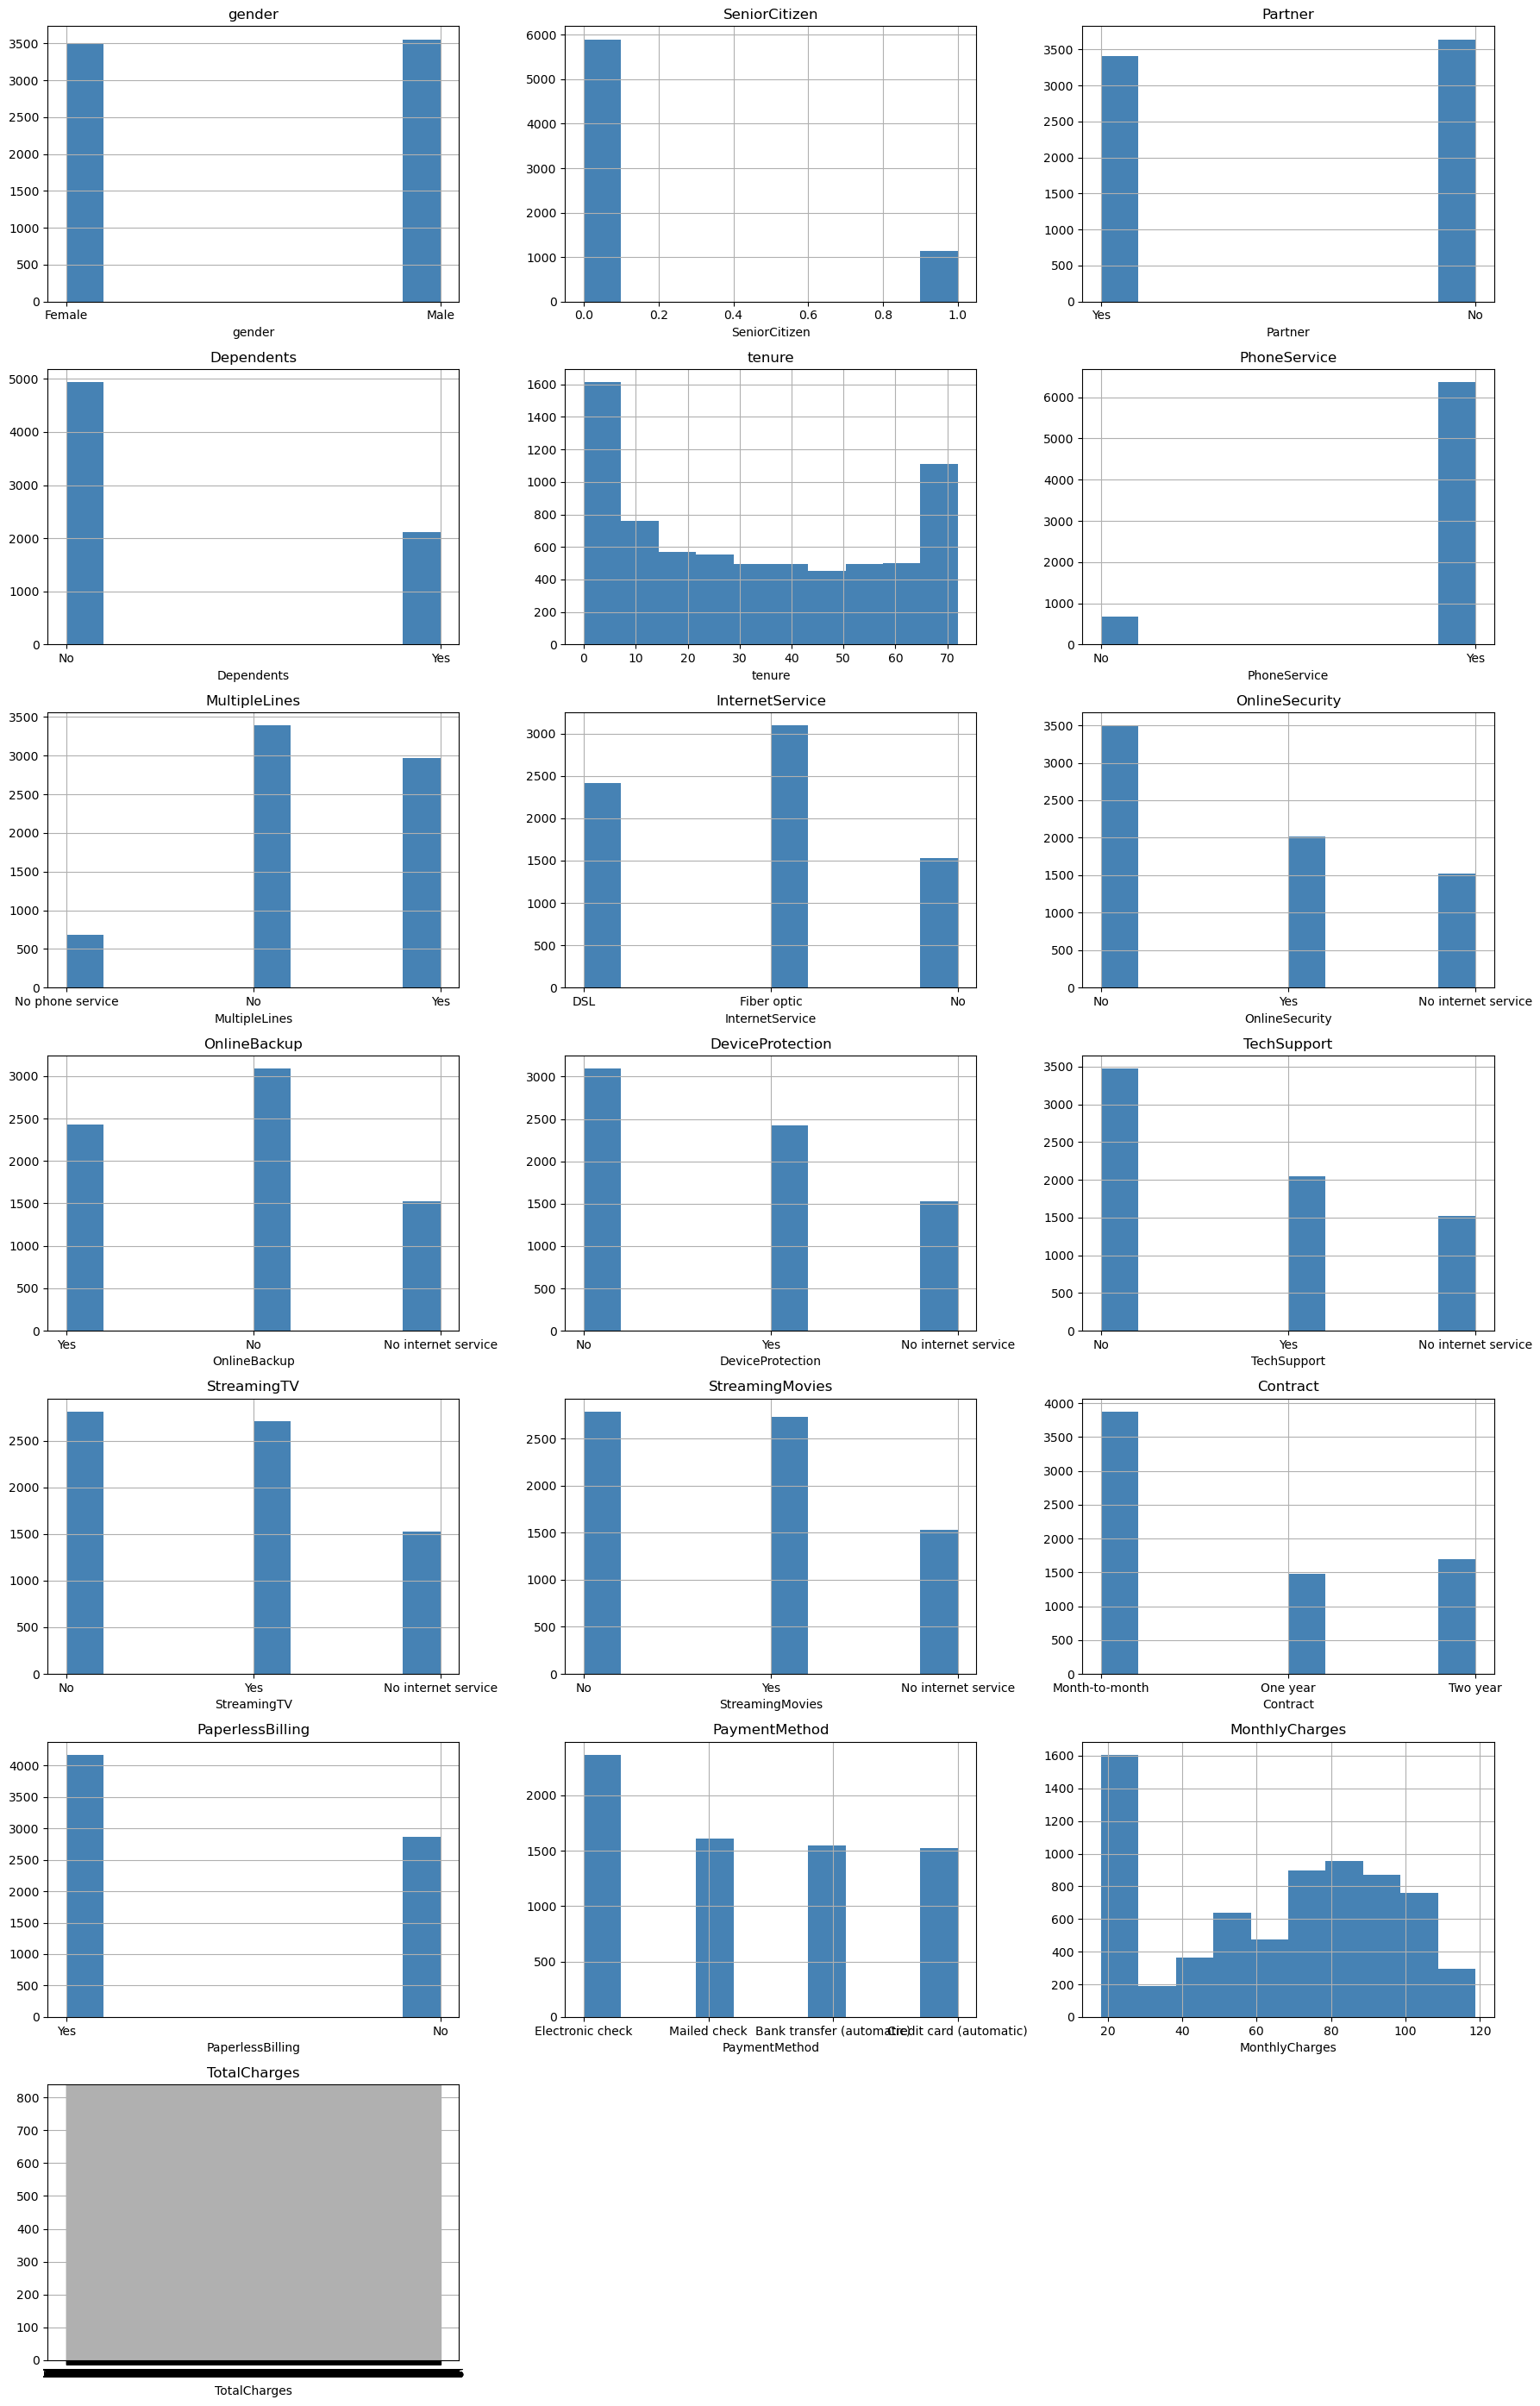

In [211]:
df_withous_customerId = df.drop('customerID' , axis=1)
plot = df_withous_customerId.drop('Churn', axis=1)
# Define number of features to plot
n = len(plot.columns)


ncols = 3
nrows = (n + ncols - 1) // ncols  

# Create subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(6 * ncols, 4 * nrows))
axes = axes.flatten()  


for i, col in enumerate(plot.columns):
    ax = axes[i]
    ax.hist(df_withous_customerId[col] , color='steelblue')
    ax.set_xlabel(col)
    ax.set_title(f'{col}')
    ax.grid(True)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [22]:
df = df.drop('customerID' , axis=1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Gender/Churn
Whether the customer is a male or a female

In [360]:
df['gender'].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

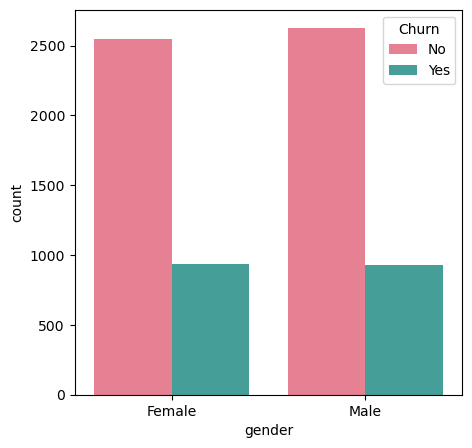

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: count, dtype: int64

In [302]:
axe , fig = plt.subplots(figsize=(5,5))
axe = sns.countplot(x='gender' , hue='Churn' , data=df ,  palette='husl')
plt.show()
df.groupby("gender")["Churn"].value_counts()

as it clear , the Female and Male has the (almost) same result

### SeniorCitizen/Churn
Whether the customer is a senior citizen or not (1, 0)

In [363]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

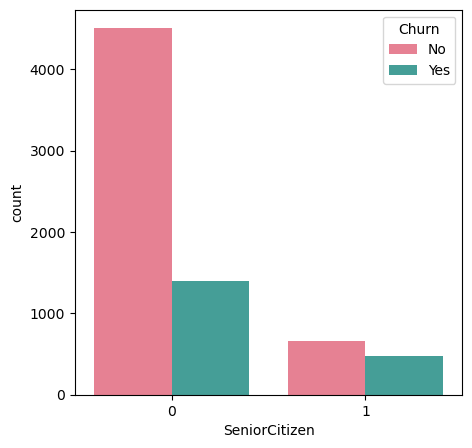

(None,
 SeniorCitizen  Churn
 0              No       4508
                Yes      1393
 1              No        666
                Yes       476
 Name: count, dtype: int64)

In [326]:
df['SeniorCitizen'].value_counts()
axe , fig = plt.subplots(figsize=(5,5))
axe = sns.countplot(x='SeniorCitizen' , hue='Churn' , data=df , palette='husl')
plt.show() , df.groupby("SeniorCitizen")["Churn"].value_counts() 

when a person for SeniorCitizen marked as 0 the result of Churn are likly to be NO , and as for 1 the result is not very clear

### Partner/Churn
Whether the customer has a partner or not (Yes, No)

In [365]:
df['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

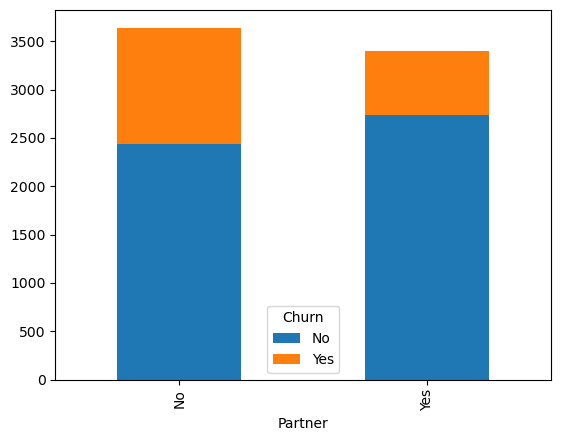

Partner  Churn
No       No       2441
         Yes      1200
Yes      No       2733
         Yes       669
Name: count, dtype: int64

In [308]:
pd.crosstab(df['Partner'], df['Churn']).plot(kind='bar', stacked=True)
plt.show() 
df.groupby("Partner")["Churn"].value_counts()

we can say that for partner/Churn , data divided so good and it's clear

### Dependents/Churn
Whether the customer has dependents or not (Yes, No)

In [367]:
df['Dependents'].value_counts()

Dependents
No     4933
Yes    2110
Name: count, dtype: int64

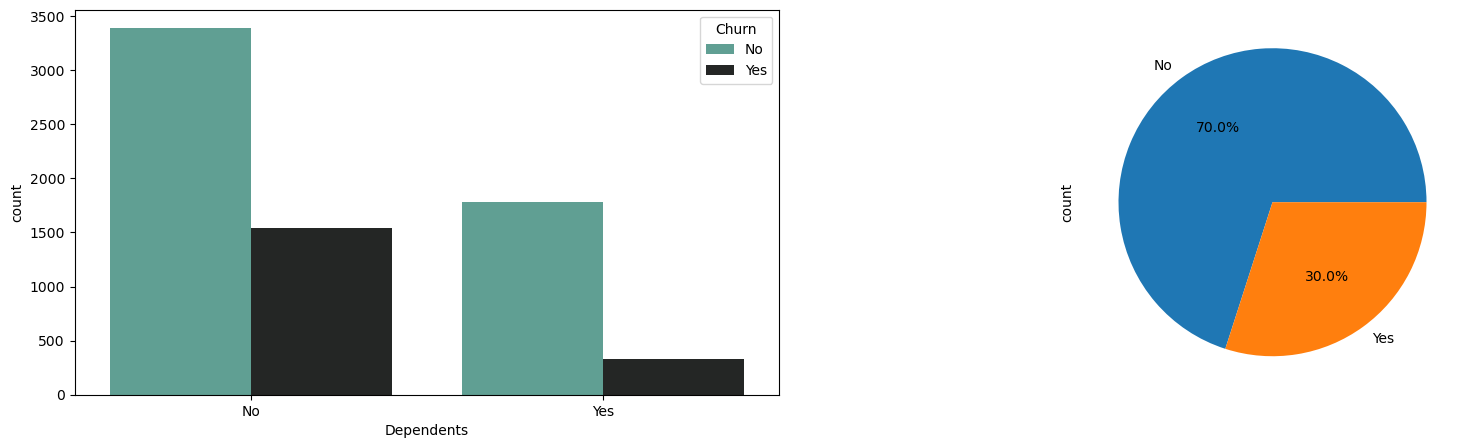

(None,
 Dependents  Churn
 No          No       3390
             Yes      1543
 Yes         No       1784
             Yes       326
 Name: count, dtype: int64)

In [324]:
df['Dependents'].value_counts()
fig , axe = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.countplot(x='Dependents' , hue='Churn' , data=df , palette='dark:#5A9_r' , ax=axe[0])
df['Dependents'].value_counts().plot.pie(autopct='%1.1f%%' , ax=axe[1])
plt.show() , df.groupby("Dependents")["Churn"].value_counts() 

### tenure/Churn
Number of months the customer has stayed with the company

C:\Users\l3lac\AppData\Local\Temp\ipykernel_2488\1647500705.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Churn', y='tenure', data=df, palette='viridis', ax=axe)


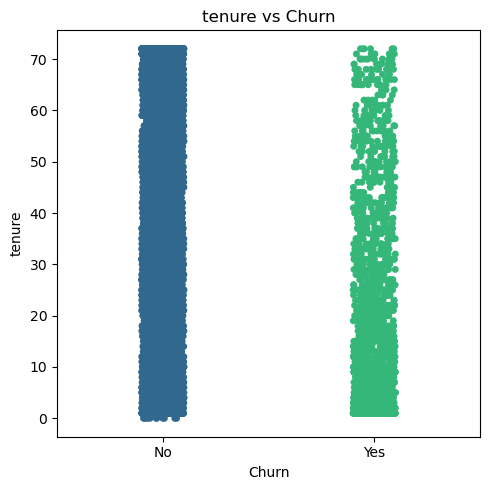

In [208]:
fig, axe = plt.subplots(figsize=(5, 5))
sns.stripplot(x='Churn', y='tenure', data=df, palette='viridis', ax=axe)
axe.set_title('tenure vs Churn')
axe.set_xlabel('Churn')
axe.set_ylabel('tenure')
plt.tight_layout()
plt.show()

there isn't much to understand just that when Churn is yes , there is more white space than when it is no

C:\Users\l3lac\AppData\Local\Temp\ipykernel_2488\3470556984.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='viridis', ax=axe)


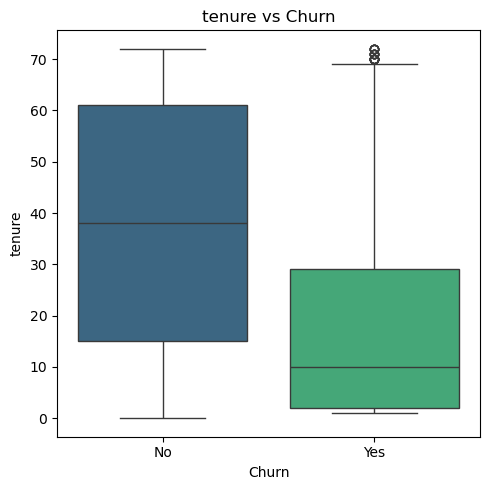

In [210]:
fig, axe = plt.subplots(figsize=(5, 5))
sns.boxplot(x='Churn', y='tenure', data=df, palette='viridis', ax=axe)
axe.set_title('tenure vs Churn')
axe.set_xlabel('Churn')
axe.set_ylabel('tenure')
plt.tight_layout()
plt.show()

the higher number of tenure , we can say the Churn become No 

we have many outliers in Yes scenario , that may corrupt our works

Text(0.5, 1.0, 'histogram of tenture with skewnes of 0.24')

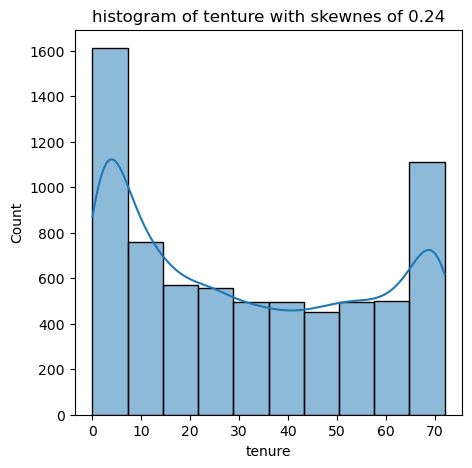

In [233]:
fig, axe = plt.subplots(figsize=(5, 5))
sns.histplot(df['tenure'] , kde=True , bins=10)
axe.set_title(f"histogram of tenture with skewnes of {round(df['tenure'].skew() , 2)}")

almost symmetric with a little bit of right skew(the value is poseitive)

### PhoneService/Churn
Whether the customer has a phone service or not (Yes, No)

In [369]:
df['PhoneService'].value_counts()

PhoneService
Yes    6361
No      682
Name: count, dtype: int64

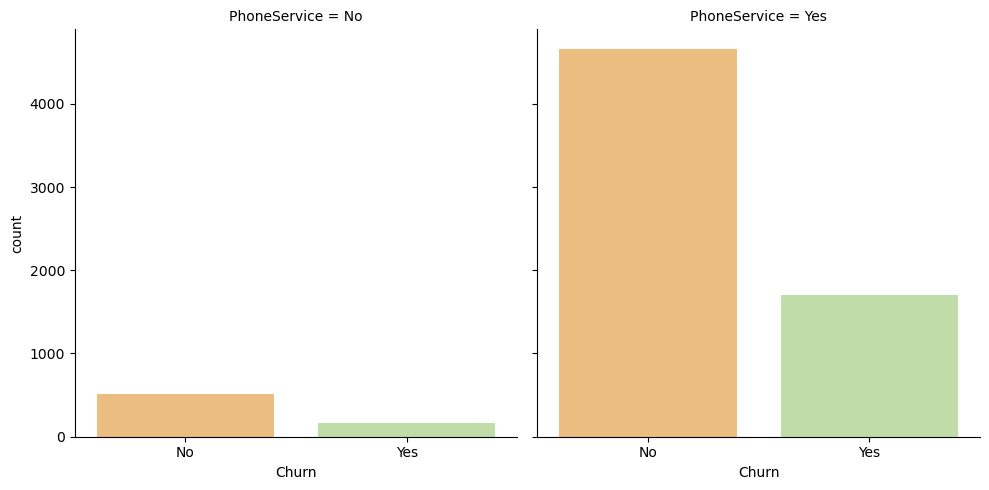

In [318]:
sns.catplot(x = 'Churn',
            col = 'PhoneService',
            kind='count',
            palette='Spectral',
            hue='Churn',
            data = df)

we can say that mostly when phoneservice is Yes the Churn can be No ,

but fot PhonwService=NO is not very clear

### MultipleLines/Churn
Whether the customer has multiple lines or not (Yes, No, No phone service)

In [371]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

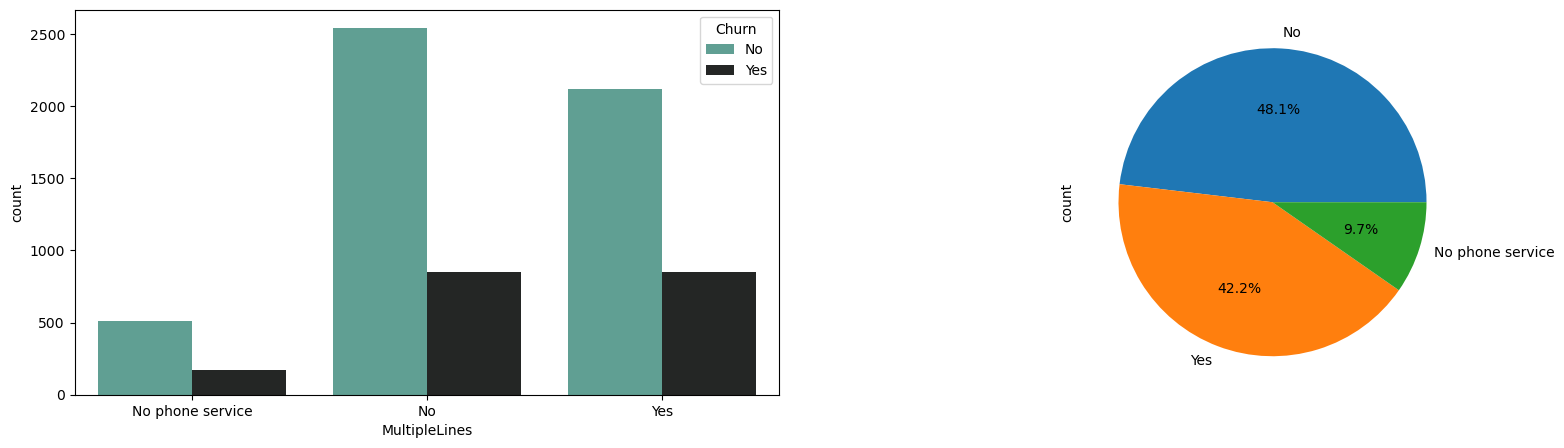

In [330]:
fig , axe = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.countplot(x='MultipleLines' , hue='Churn' , data=df , palette='dark:#5A9_r' , ax=axe[0])
df['MultipleLines'].value_counts().plot.pie(autopct='%1.1f%%' , ax=axe[1])
plt.show()

beacuse our value increase here , having a pie chart look good and give us insight of how much each value is in our colunm

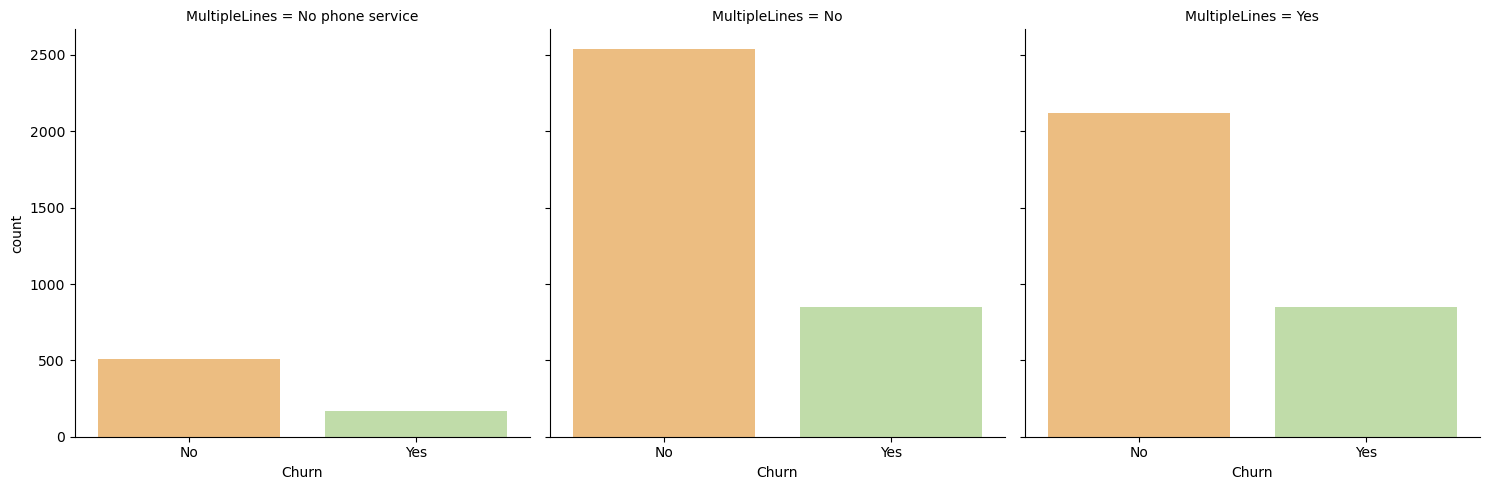

In [320]:
sns.catplot(x = 'Churn',
            col = 'MultipleLines',
            kind='count',
            hue='Churn',
             palette='Spectral',
            data = df)

### InternetService/Churn
Customer’s internet service provider (DSL, Fiber optic, No)

In [373]:
df['InternetService'].value_counts()

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

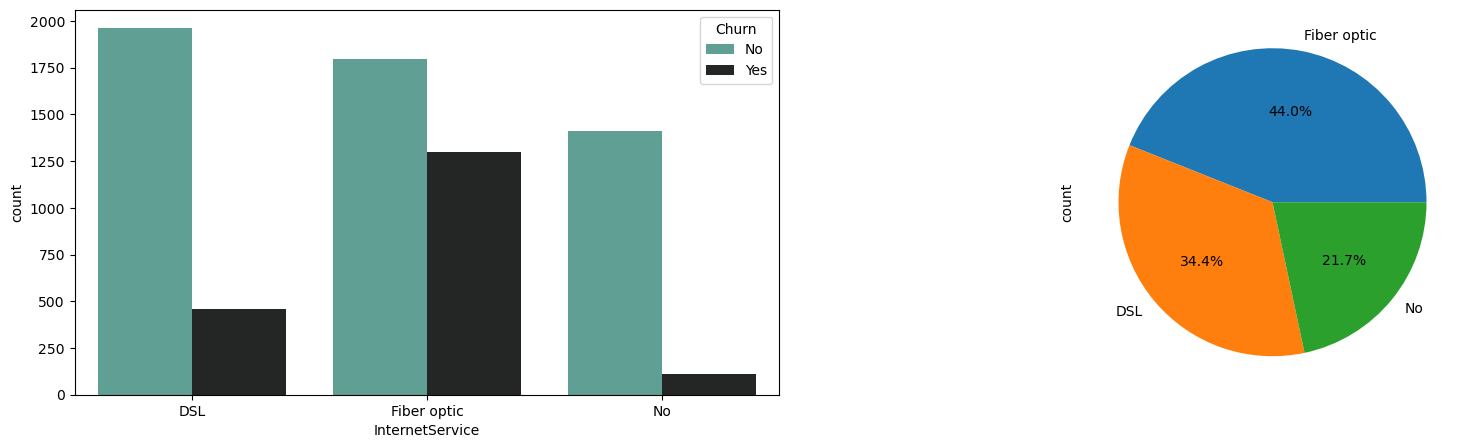

In [328]:
fig , axe = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.countplot(x='InternetService' , hue='Churn' , data=df , palette='dark:#5A9_r' , ax=axe[0])
df['InternetService'].value_counts().plot.pie(autopct='%1.1f%%' , ax=axe[1] )
plt.show()

In [298]:
df.groupby("InternetService")['Churn'].value_counts()

InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
Name: count, dtype: int64

### OnlineSecurity/Churn
Whether the customer has online security or not (Yes, No, No internet service)

In [375]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

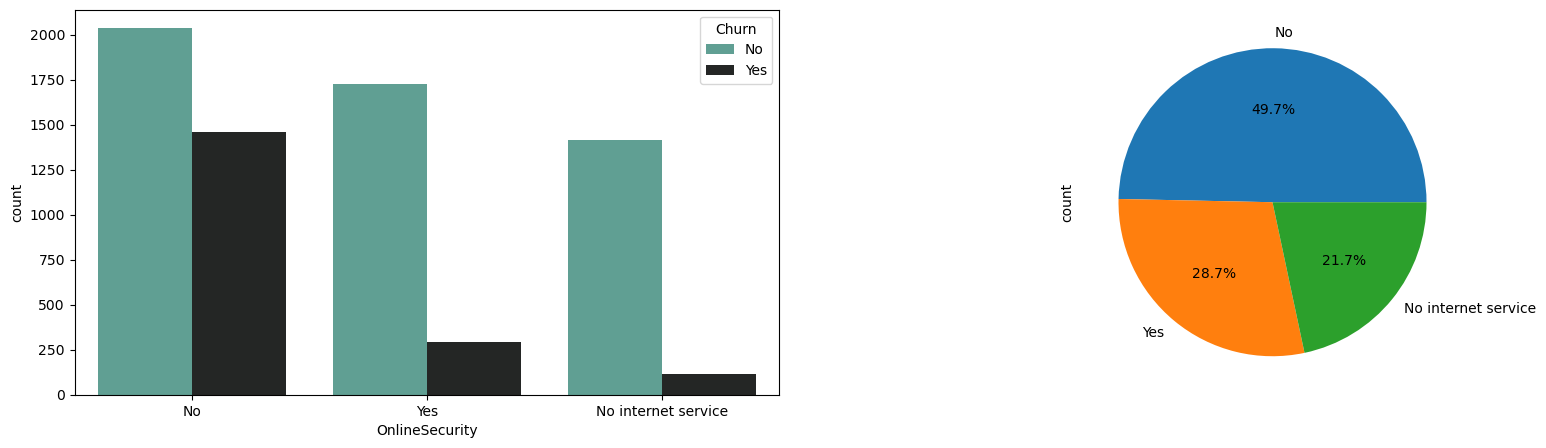

In [343]:
fig , axe = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.countplot(x='OnlineSecurity' , hue='Churn' , data = df , palette='dark:#5A9_r' , ax=axe[0])
df['OnlineSecurity'].value_counts().plot.pie(autopct='%1.1f%%' , ax=axe[1])
plt.show()

### OnlineBackup/Churn
Whether the customer has online backup or not (Yes, No, No internet service)

In [377]:
df['OnlineBackup'].value_counts()

OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

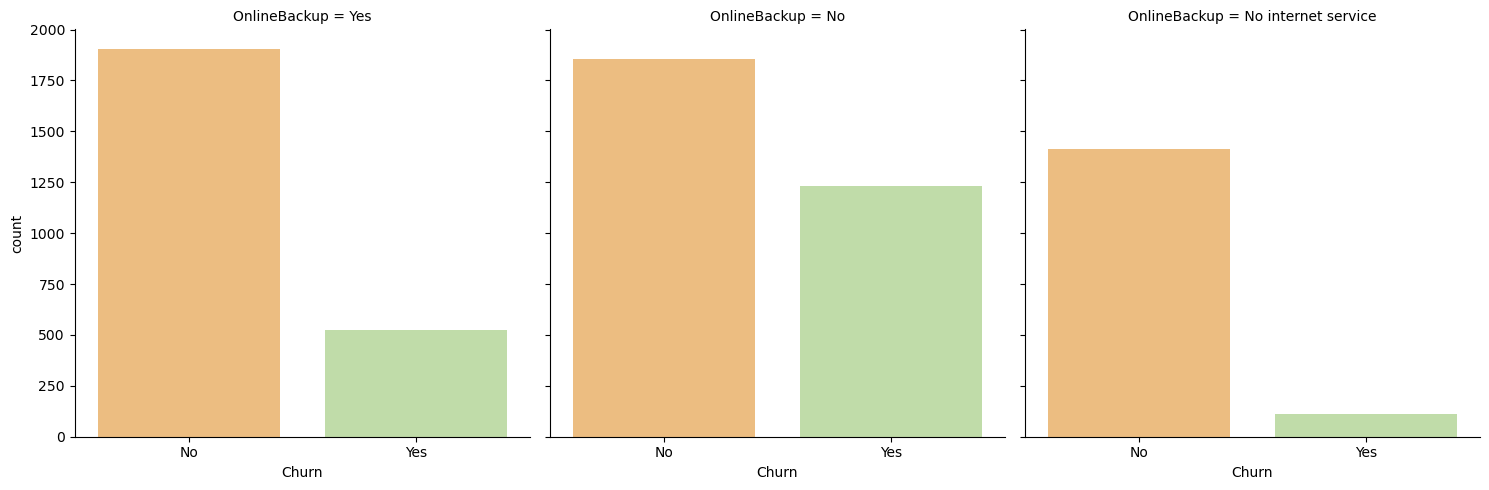

In [350]:
sns.catplot(x = 'Churn',
            col = 'OnlineBackup',
            kind='count',
            hue='Churn',
             palette='Spectral',
            data = df)

In [354]:
df.groupby('OnlineBackup')['Churn'].value_counts()

OnlineBackup         Churn
No                   No       1855
                     Yes      1233
No internet service  No       1413
                     Yes       113
Yes                  No       1906
                     Yes       523
Name: count, dtype: int64

### DeviceProtection/Churn
Whether the customer has device protection or not (Yes, No, No internet service)

In [379]:
df['DeviceProtection'].value_counts()

DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

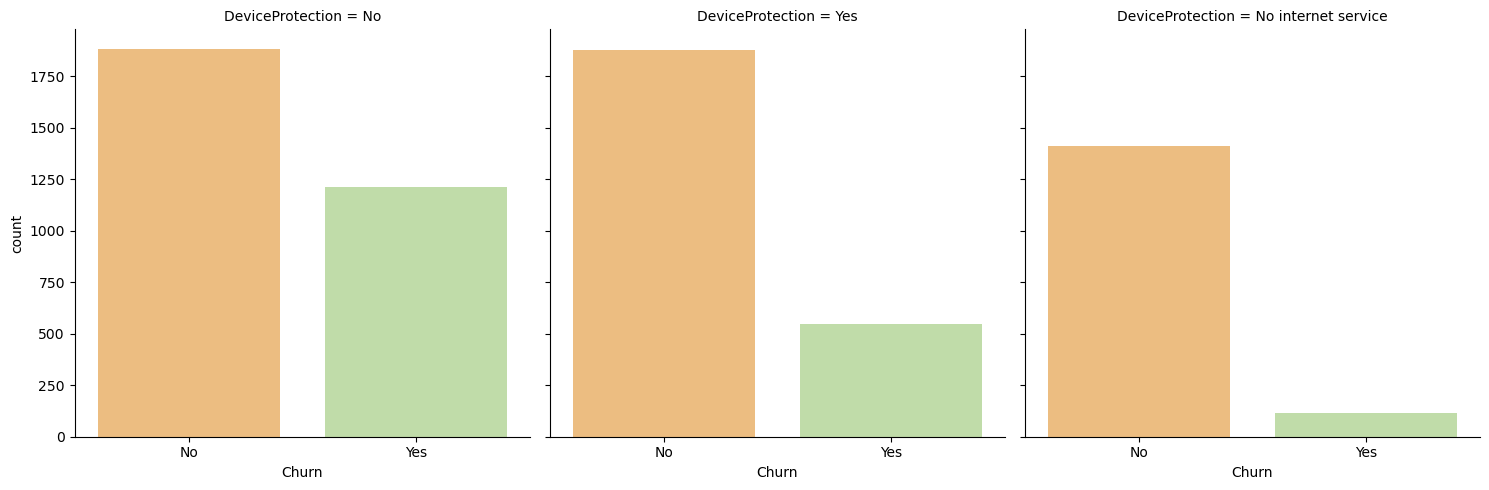

In [381]:
sns.catplot(x = 'Churn',
            col = 'DeviceProtection',
            kind='count',
            hue='Churn',
             palette='Spectral',
            data = df)

In [383]:
df.groupby('DeviceProtection')['Churn'].value_counts()

DeviceProtection     Churn
No                   No       1884
                     Yes      1211
No internet service  No       1413
                     Yes       113
Yes                  No       1877
                     Yes       545
Name: count, dtype: int64

### TechSupport/Churn           
Whether the customer has tech support or not (Yes, No, No internet service)

In [386]:
df['TechSupport'].value_counts()

TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

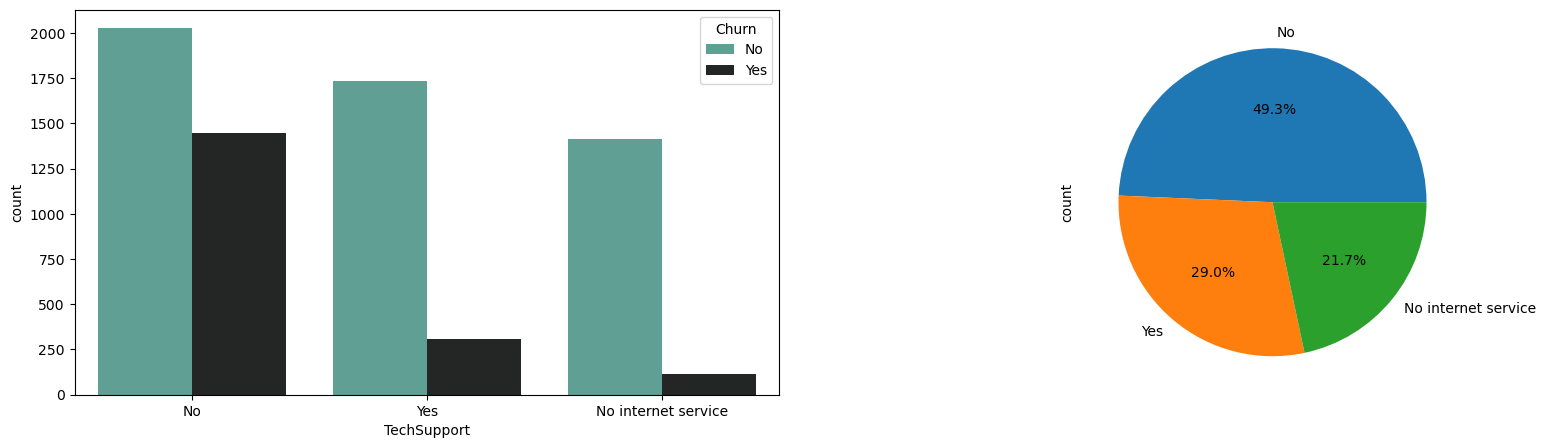

In [388]:
fig , axe = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.countplot(x='TechSupport' , hue='Churn' , data = df , palette='dark:#5A9_r' , ax=axe[0])
df['TechSupport'].value_counts().plot.pie(autopct='%1.1f%%' , ax=axe[1])
plt.show()

### StreamingTV/Churn
Whether the customer has tech support or not (Yes, No, No internet service)

In [398]:
df['StreamingTV'].value_counts()

StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

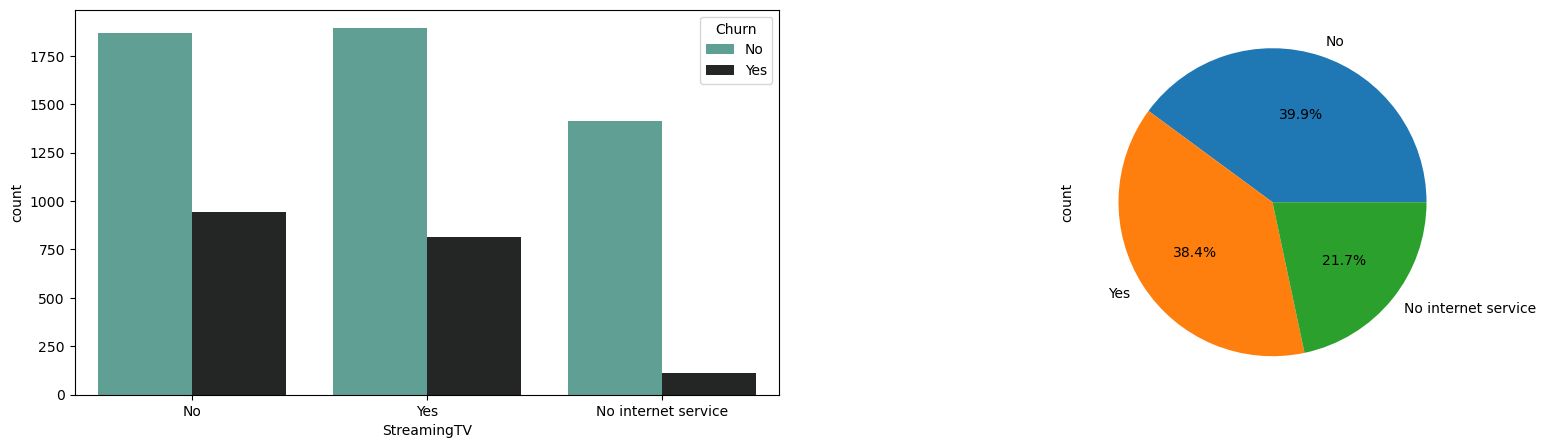

In [400]:
 fig , axe = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.countplot(x='StreamingTV' , hue='Churn' , data = df , palette='dark:#5A9_r' , ax=axe[0])
df['StreamingTV'].value_counts().plot.pie(autopct='%1.1f%%' , ax=axe[1])
plt.show()

### StreamingMovies/Churn
Whether the customer has streaming movies or not (Yes, No, No internet service)

In [403]:
df['StreamingMovies'].value_counts()

StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

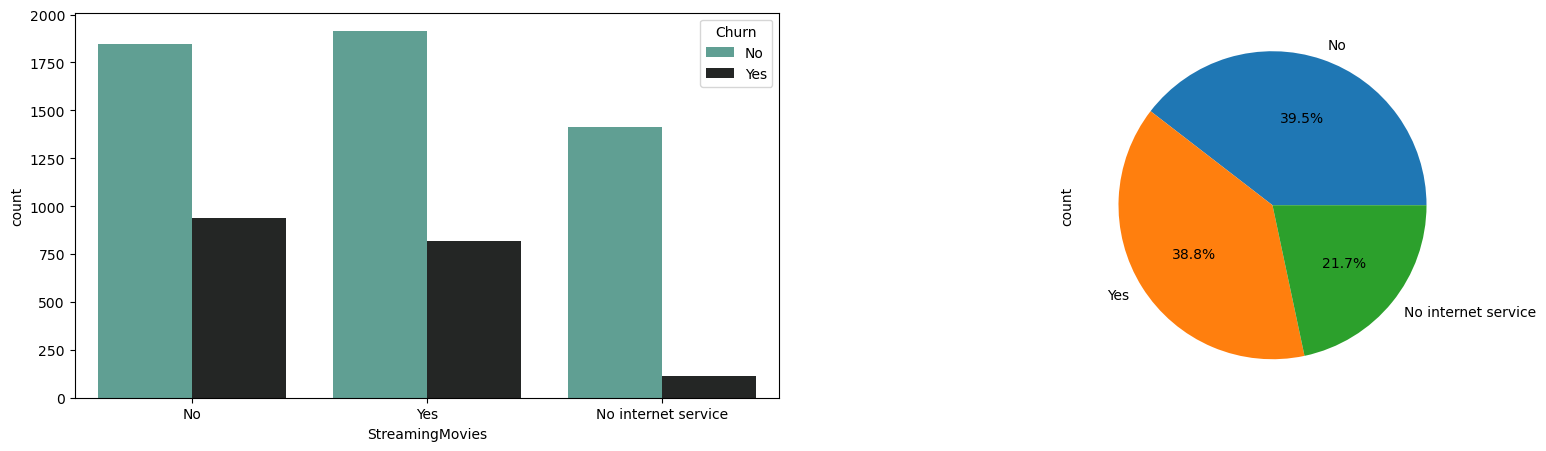

In [405]:
 fig , axe = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.countplot(x='StreamingMovies' , hue='Churn' , data = df , palette='dark:#5A9_r' , ax=axe[0])
df['StreamingMovies'].value_counts().plot.pie(autopct='%1.1f%%' , ax=axe[1])
plt.show()

### Contract/Churn
The contract term of the customer (Month-to-month, One year, Two year)

In [411]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

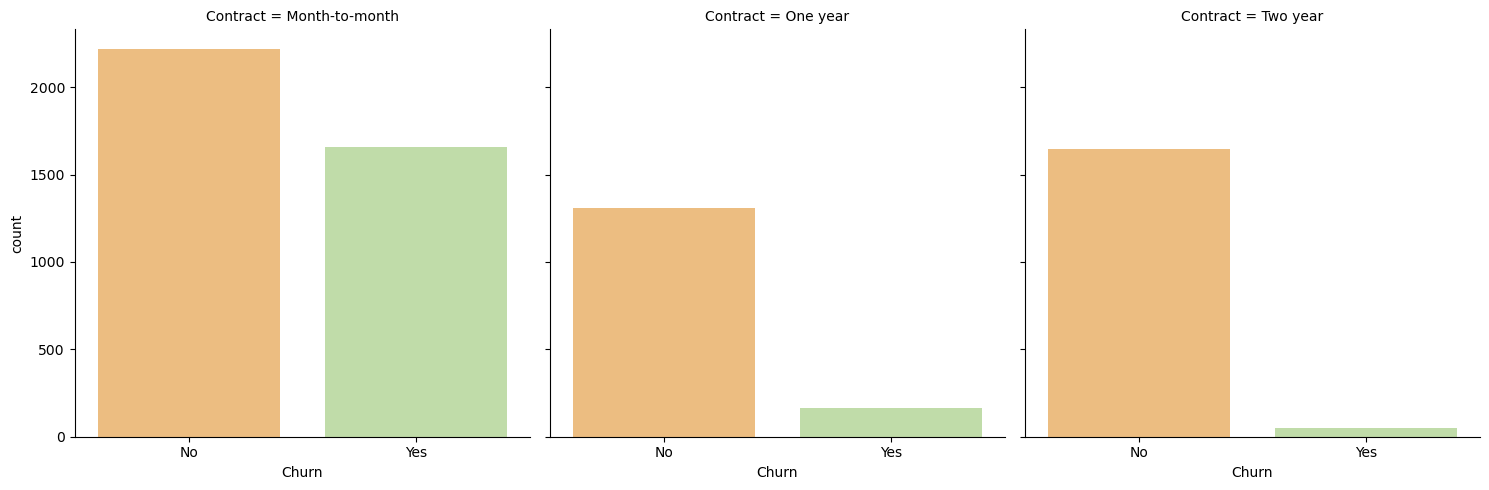

In [413]:
sns.catplot(x = 'Churn',
            col = 'Contract',
            kind='count',
            hue='Churn',
             palette='Spectral',
            data = df)

### PaperlessBilling/Churn
Whether the customer has paperless billing or not (Yes, No)

In [421]:
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

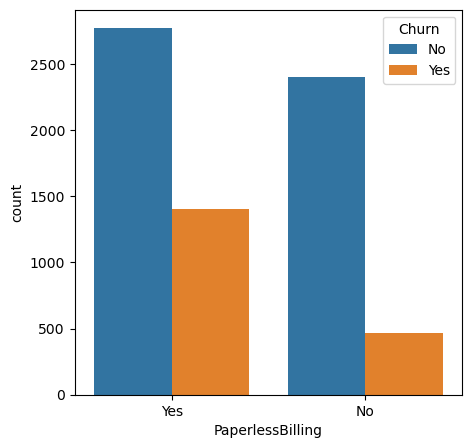

In [423]:
fig , axe = plt.subplots(figsize=(5,5))
sns.countplot(x='PaperlessBilling' , hue='Churn' , data = df , ax=axe)
plt.show()

### PaymentMethod/Churn
The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card

In [427]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

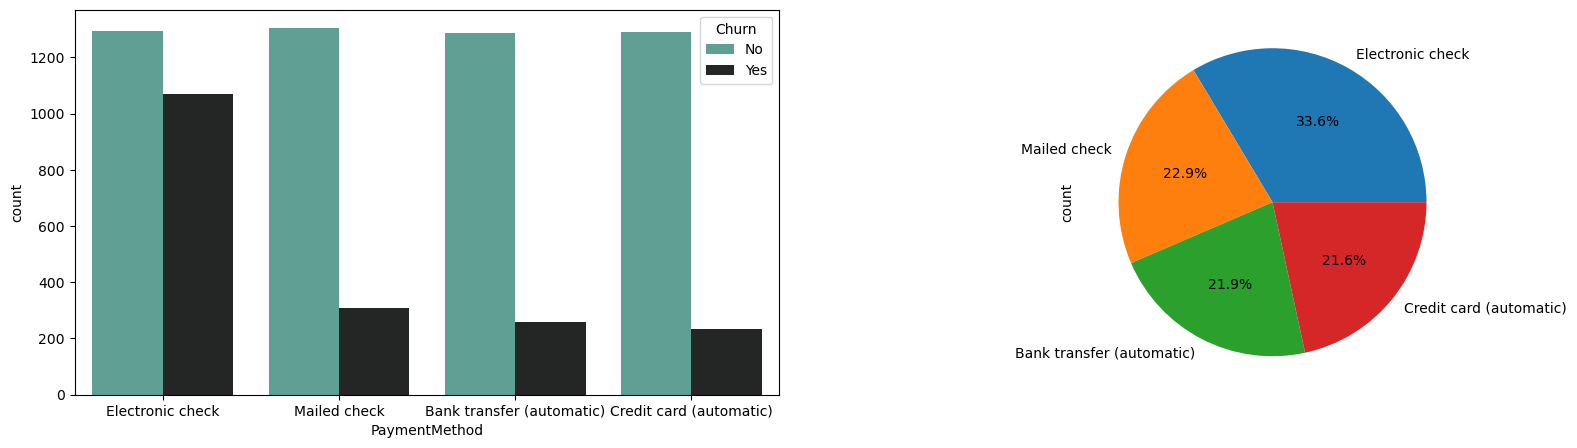

In [429]:
 fig , axe = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
sns.countplot(x='PaymentMethod' , hue='Churn' , data = df , palette='dark:#5A9_r' , ax=axe[0])
df['PaymentMethod'].value_counts().plot.pie(autopct='%1.1f%%' , ax=axe[1])
plt.show()

### MonthlyCharges/Churn
The amount charged to the customer monthly

In [449]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype(np.float64)

Text(0.5, 1.0, 'histogram of tenture with skewnes of -0.22')

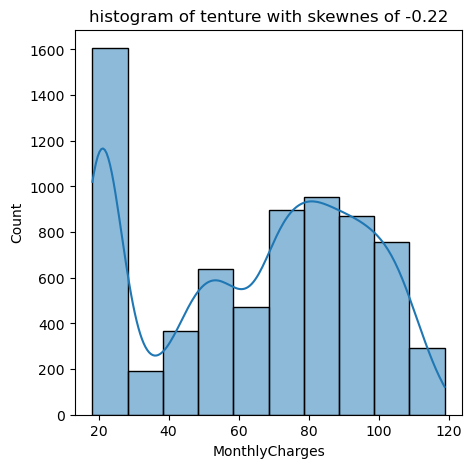

In [463]:
fig, axe = plt.subplots(figsize=(5, 5))
sns.histplot(df['MonthlyCharges'] , kde=True , bins=10)
axe.set_title(f"histogram of tenture with skewnes of {round(df['MonthlyCharges'].skew() , 2)}")

the monthlycharges are skewed to left which mean more of it value are smaller than mean

In [465]:
df.groupby('Churn')['MonthlyCharges'].mean()

Churn
No     61.265124
Yes    74.441332
Name: MonthlyCharges, dtype: float64

C:\Users\l3lac\AppData\Local\Temp\ipykernel_2488\506819643.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='viridis', ax=axe)


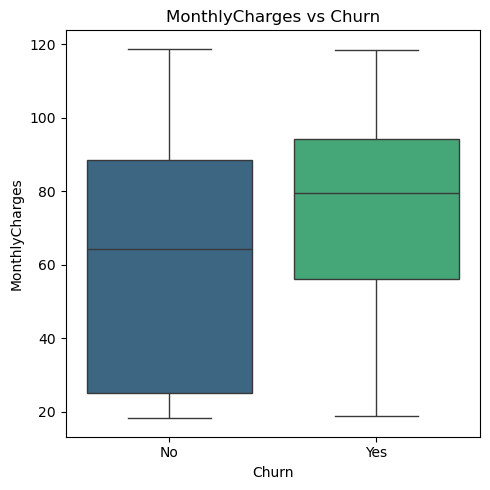

In [459]:
fig, axe = plt.subplots(figsize=(5, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='viridis', ax=axe)
axe.set_title('MonthlyCharges vs Churn')
axe.set_xlabel('Churn')
axe.set_ylabel('MonthlyCharges')
plt.tight_layout()
plt.show()

C:\Users\l3lac\AppData\Local\Temp\ipykernel_2488\780383953.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette='viridis', ax=axe)


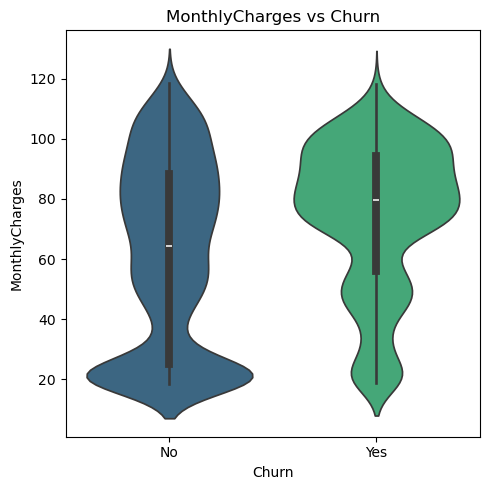

In [467]:
fig, axe = plt.subplots(figsize=(5, 5))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette='viridis', ax=axe)
axe.set_title('MonthlyCharges vs Churn')
axe.set_xlabel('Churn')
axe.set_ylabel('MonthlyCharges')
plt.tight_layout()
plt.show()

### TotalCharges/Churn
The total amount charged to the customer

In [38]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [40]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Text(0.5, 1.0, 'histogram of tenture with skewnes of 0.96')

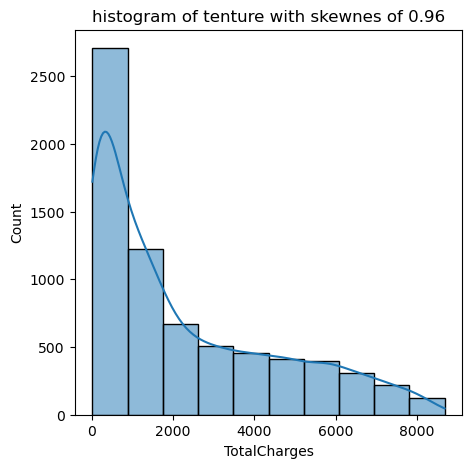

In [484]:
fig, axe = plt.subplots(figsize=(5, 5))
sns.histplot(df['TotalCharges'] , kde=True , bins=10)
axe.set_title(f"histogram of tenture with skewnes of {round(df['TotalCharges'].skew() , 2)}")

C:\Users\l3lac\AppData\Local\Temp\ipykernel_2488\2922004285.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='viridis', ax=axe)


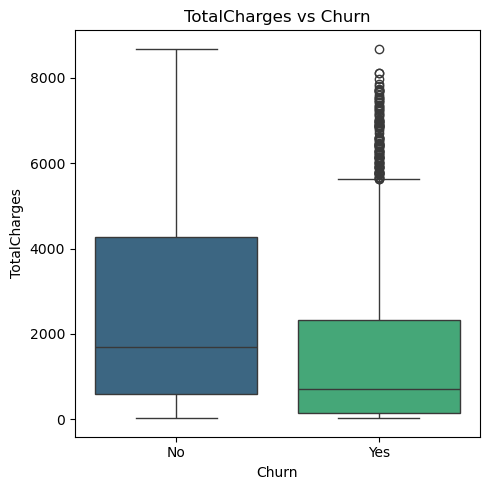

In [486]:
fig, axe = plt.subplots(figsize=(5, 5))
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='viridis', ax=axe)
axe.set_title('TotalCharges vs Churn')
axe.set_xlabel('Churn')
axe.set_ylabel('TotalCharges')
plt.tight_layout()
plt.show()

C:\Users\l3lac\AppData\Local\Temp\ipykernel_2488\2276676266.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='TotalCharges', data=df, palette='viridis', ax=axe)


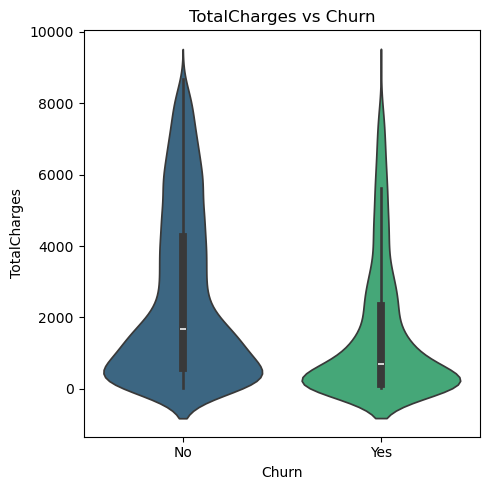

In [488]:
fig, axe = plt.subplots(figsize=(5, 5))
sns.violinplot(x='Churn', y='TotalCharges', data=df, palette='viridis', ax=axe)
axe.set_title('TotalCharges vs Churn')
axe.set_xlabel('Churn')
axe.set_ylabel('TotalCharges')
plt.tight_layout()
plt.show()

## we did all sort of viaulization on our data and now have more insight about it

### now it's time for preprocesing and prepare data for modeling

# change the dual obj value into 1 and 0 to creat a heat map , do more preprocesing

In [212]:
from sklearn.preprocessing import LabelEncoder

DF = df.copy()
y_le = LabelEncoder()

# List of categorical columns to encode
cols_to_encode = ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


for col in cols_to_encode:
    DF[col] = y_le.fit_transform(DF[col])
DF

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,1,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,1,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,0,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,1,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Mailed check,74.40,306.6,1


<Axes: >

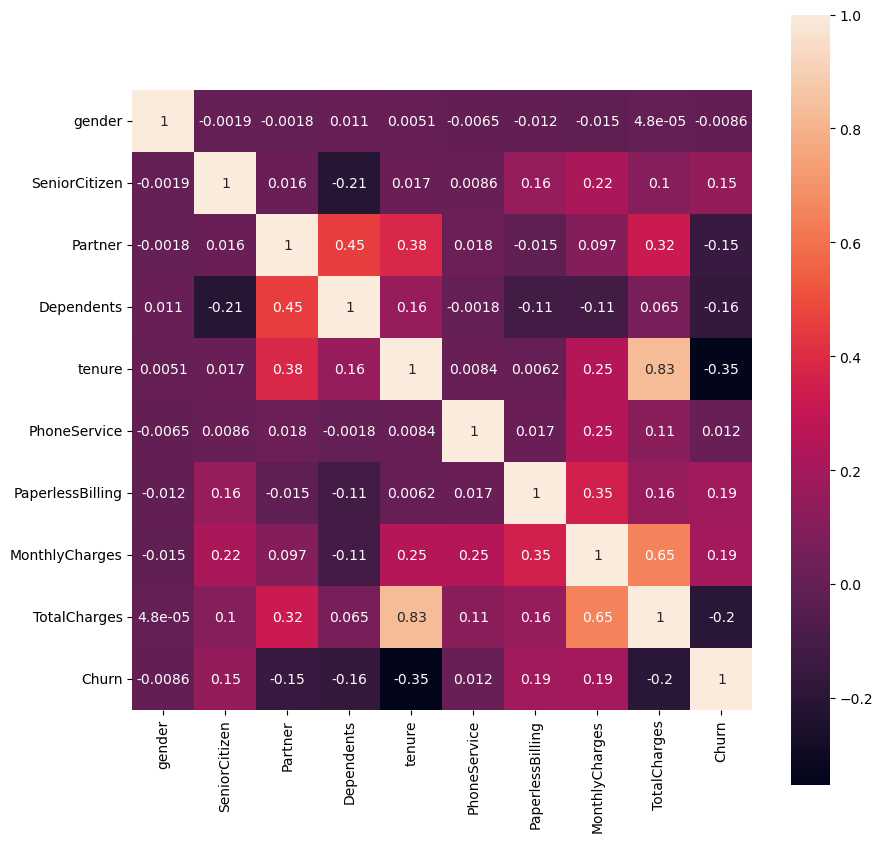

In [74]:
fig , axe = plt.subplots(figsize=(10,10))
corr_mat = DF.corr(numeric_only=True)
sns.heatmap(corr_mat , square=True , annot=True)

there is not many correlation between our features and our target , mabe a slightly corr between `tenure , TotalCharges,MonthlyCharges,PaperlessBilling` 

In [80]:
outliers_df = DF.copy()

num_cols = outliers_df.select_dtypes(include=['int64', 'float64','int32']).columns


Q1 = outliers_df[num_cols].quantile(0.25)
Q3 = outliers_df[num_cols].quantile(0.75)
IQR = Q3 - Q1


mask = ~((outliers_df[num_cols] < (Q1 - 1.5 * IQR)) | (outliers_df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)


outliers_df = outliers_df[mask].reset_index(drop=True)
outliers_df.shape , DF.shape

((5323, 20), (7043, 20))

build another data set for detected and deleted outliers

In [83]:
x_with_outliers = DF.drop('Churn' , axis = 1)
y_with_outliers = DF['Churn']
x_without_outliers = outliers_df.drop('Churn' , axis = 1)
y_without_outliers = outliers_df['Churn']

## from now on we continue with data without the outliers and after that do the same thing on the data with outliers

In [88]:
num_col = x_without_outliers.select_dtypes(include=['float64' , 'int64' , 'int32']).columns
obj_col = x_without_outliers.select_dtypes(include=['object']).columns
num_col , obj_col

(Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges'],
       dtype='object'),
 Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaymentMethod'],
       dtype='object'))

In [90]:
#building a pipe line for encoding categorical features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# OneHotEncoder setup inside ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), obj_col)],remainder='passthrough')
# Fit and transform x
x_encoded = preprocessor.fit_transform(x_without_outliers)

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_encoded,y_without_outliers,test_size=0.2,random_state=42)
len(x_train) , len(y_train)

(4258, 4258)

## XGBClassifier as a model

In [118]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb_params = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
    'max_depth': list(range(3, 10)),
    'subsample': [0.5 , 0.7 , 0.8 , 0.9]
}
xgb_search = GridSearchCV(estimator=XGBClassifier(),param_grid=xgb_params,cv=5 , scoring="accuracy" , verbose=True , n_jobs=-1)
xgb_search.fit(x_train,y_train)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


C:\Users\l3lac\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [100, 200, 500, 1000],
                         'subsample': [0.5, 0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=True)

In [120]:
xgb_search.best_params_ , xgb_search.best_score_

({'learning_rate': 0.01,
  'max_depth': 4,
  'n_estimators': 200,
  'subsample': 0.5},
 0.8139970650380939)

In [148]:
xgb_search.score(x_test , y_test)

0.8394366197183099

### evaluation base on recall , F1 , and precision too

In [160]:
from sklearn.metrics import recall_score , accuracy_score , f1_score , precision_score
y_pred = xgb_search.predict(x_test)
print(f"recall score is {recall_score(y_test , y_pred):.2%}")
print(f"f1 score is {f1_score(y_test , y_pred):.2%}")
print(f"precision score is {precision_score(y_test , y_pred):.2%}")
print(f"accuracy score is {accuracy_score(y_test , y_pred):.2%}")

recall score is 43.70%
f1 score is 54.88%
precision score is 73.76%
accuracy score is 83.94%


## RandomForestClassifier as a model

In [113]:
forest_params = {'n_estimators' : [100,200,500,1000],
              'max_depth' : list(range(3,20)) , 
              'min_samples_split' : [2,4,6,8],
              'min_samples_leaf' : [1,3,5,7]
}

In [170]:
from sklearn.ensemble import RandomForestClassifier
randomforest_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=forest_params,cv=5 , scoring="accuracy" , verbose=True , n_jobs=-1)
randomforest_search.fit(x_train,y_train)

Fitting 5 folds for each of 1088 candidates, totalling 5440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [100, 200, 500, 1000]},
             scoring='accuracy', verbose=True)

In [172]:
randomforest_search.best_params_ , randomforest_search.best_score_

({'max_depth': 5,
  'min_samples_leaf': 3,
  'min_samples_split': 4,
  'n_estimators': 1000},
 0.8111793361027898)

### evaluation base on recall , F1 , and precision too

In [174]:
from sklearn.metrics import recall_score , accuracy_score , f1_score , precision_score
y_pred = randomforest_search.predict(x_test)
print(f"recall score is {recall_score(y_test , y_pred):.2%}")
print(f"f1 score is {f1_score(y_test , y_pred):.2%}")
print(f"precision score is {precision_score(y_test , y_pred):.2%}")
print(f"accuracy score is {accuracy_score(y_test , y_pred):.2%}")

recall score is 41.60%
f1 score is 52.80%
precision score is 72.26%
accuracy score is 83.38%


## now we do what we did for data with outliers

In [177]:
num_col = x_with_outliers.select_dtypes(include=['float64' , 'int64' , 'int32']).columns
obj_col = x_with_outliers.select_dtypes(include=['object']).columns
num_col , obj_col

(Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges'],
       dtype='object'),
 Index(['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
        'Contract', 'PaymentMethod'],
       dtype='object'))

In [179]:
# OneHotEncoder setup inside ColumnTransformer
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), obj_col)],remainder='passthrough')
# Fit and transform x
x_encoded = preprocessor.fit_transform(x_with_outliers)
len(x_encoded)

7043

In [181]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_encoded,y_with_outliers,test_size=0.2,random_state=42)
len(x_train) , len(y_train)

(5634, 5634)

### XGBClassifier

In [183]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb_params = {
    'n_estimators': [100, 200, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
    'max_depth': list(range(3, 10)),
    'subsample': [0.5 , 0.7 , 0.8 , 0.9]
}
xgb_search_with_outliers = GridSearchCV(estimator=XGBClassifier(),param_grid=xgb_params,cv=5 , scoring="accuracy" , verbose=True , n_jobs=-1)
xgb_search_with_outliers.fit(x_train,y_train)

Fitting 5 folds for each of 560 candidates, totalling 2800 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'n_estimators': [100, 200, 500, 1000],
                         'subsample': [0.5, 0.7, 0.8, 0.9]},
             scoring='accuracy', verbose=True)

In [185]:
xgb_search_with_outliers.best_params_ , xgb_search_with_outliers.best_score_

({'learning_rate': 0.01,
  'max_depth': 3,
  'n_estimators': 500,
  'subsample': 0.7},
 0.8063542847056191)

### recall , F1 , and precision too

In [187]:
y_pred = xgb_search_with_outliers.predict(x_test)
print(f"recall score is {recall_score(y_test , y_pred):.2%}")
print(f"f1 score is {f1_score(y_test , y_pred):.2%}")
print(f"precision score is {precision_score(y_test , y_pred):.2%}")
print(f"accuracy score is {accuracy_score(y_test , y_pred):.2%}")

recall score is 55.23%
f1 score is 61.22%
precision score is 68.67%
accuracy score is 81.48%


## RandomForestClassifier

In [199]:
forest_params = {'n_estimators' : [100,200,500],
              'max_depth' : list(range(3,20)) , 
              'min_samples_split' : [2,4,6],
              'min_samples_leaf' : [1,3,5]
}
from sklearn.ensemble import RandomForestClassifier
randomforest_with_outliers_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=forest_params,cv=5 , scoring="accuracy" , verbose=True , n_jobs=-1)
randomforest_with_outliers_search.fit(x_train,y_train)

Fitting 5 folds for each of 459 candidates, totalling 2295 fits


C:\Users\l3lac\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 500]},
             scoring='accuracy', verbose=True)

In [201]:
randomforest_with_outliers_search.best_params_ , randomforest_with_outliers_search.best_score_

({'max_depth': 15,
  'min_samples_leaf': 5,
  'min_samples_split': 4,
  'n_estimators': 500},
 0.8033363225589871)

In [203]:
y_pred = randomforest_with_outliers_search.predict(x_test)
print(f"recall score is {recall_score(y_test , y_pred):.2%}")
print(f"f1 score is {f1_score(y_test , y_pred):.2%}")
print(f"precision score is {precision_score(y_test , y_pred):.2%}")
print(f"accuracy score is {accuracy_score(y_test , y_pred):.2%}")

recall score is 51.74%
f1 score is 58.84%
precision score is 68.20%
accuracy score is 80.84%


In [217]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1036
           1       0.68      0.52      0.59       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



#### as it come to my conclusion , the best case is for the data without outliers and the XGB and Randomforest had the same result mabe the XGb was slightly better
so we can say `xgb_search` was our best model

In [221]:
import pickle
pickle.dump(xgb_search,open('best_model.pkl','wb'))